http://preview.d2l.ai/d2l-en/PR-1117/chapter_appendix-mathematics-for-deep-learning/random-variables.html

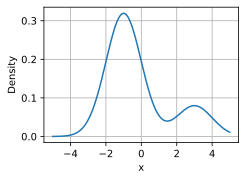

In [1]:
%matplotlib inline
from d2l import torch as d2l
from IPython import display
import torch
torch.pi = torch.acos(torch.zeros(1)).item() * 2  # Define pi in torch

# Plot the probability density function for some random variable
x = torch.arange(-5, 5, 0.01)
p = 0.2*torch.exp(-(x - 3)**2 / 2)/torch.sqrt(2 * torch.tensor(torch.pi)) + \
    0.8*torch.exp(-(x + 1)**2 / 2)/torch.sqrt(2 * torch.tensor(torch.pi))

d2l.plot(x, p, 'x', 'Density')

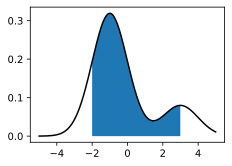

'approximate Probability: 0.7736172080039978'

In [2]:
# Approximate probability using numerical integration
epsilon = 0.01
x = torch.arange(-5, 5, 0.01)
p = 0.2*torch.exp(-(x - 3)**2 / 2) / torch.sqrt(2 * torch.tensor(torch.pi)) +\
    0.8*torch.exp(-(x + 1)**2 / 2) / torch.sqrt(2 * torch.tensor(torch.pi))

d2l.set_figsize()
d2l.plt.plot(x, p, color='black')
d2l.plt.fill_between(x.tolist()[300:800], p.tolist()[300:800])
d2l.plt.show()

f'approximate Probability: {torch.sum(epsilon*p[300:800])}'

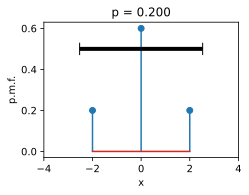

In [3]:
# Define a helper to plot these figures
def plot_chebyshev(a, p):
    d2l.set_figsize()
    d2l.plt.stem([a-2, a, a+2], [p, 1-2*p, p], use_line_collection=True)
    d2l.plt.xlim([-4, 4])
    d2l.plt.xlabel('x')
    d2l.plt.ylabel('p.m.f.')

    d2l.plt.hlines(0.5, a - 4 * torch.sqrt(2 * p),
                   a + 4 * torch.sqrt(2 * p), 'black', lw=4)
    d2l.plt.vlines(a - 4 * torch.sqrt(2 * p), 0.53, 0.47, 'black', lw=1)
    d2l.plt.vlines(a + 4 * torch.sqrt(2 * p), 0.53, 0.47, 'black', lw=1)
    d2l.plt.title(f'p = {p:.3f}')

    d2l.plt.show()

# Plot interval when p > 1/8
plot_chebyshev(0.0, torch.tensor(0.2))

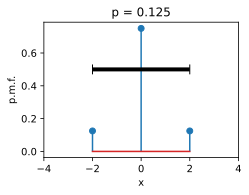

In [4]:
# Plot interval when p = 1/8
plot_chebyshev(0.0, torch.tensor(0.125))

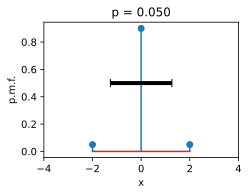

In [5]:
# Plot interval when p < 1/8
plot_chebyshev(0.0, torch.tensor(0.05))

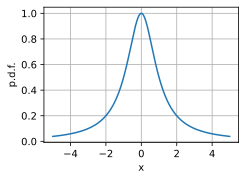

In [6]:
# Plot the Cauchy distribution p.d.f.
x = torch.arange(-5, 5, 0.01)
p = 1 / (1 + x**2)

d2l.plot(x, p, 'x', 'p.d.f.')

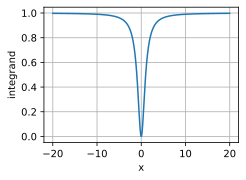

In [7]:
# Plot the integrand needed to compute the variance
x = torch.arange(-20, 20, 0.01)
p = x**2 / (1 + x**2)

d2l.plot(x, p, 'x', 'integrand')

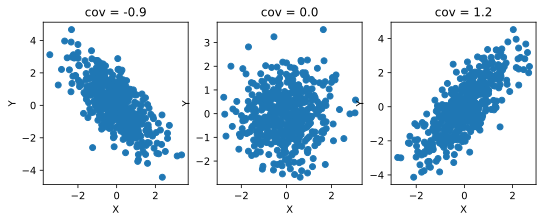

In [8]:
# Plot a few random variables adjustable covariance
covs = [-0.9, 0.0, 1.2]
d2l.plt.figure(figsize=(12, 3))
for i in range(3):
    X = torch.randn(500)
    Y = covs[i]*X + torch.randn(500)

    d2l.plt.subplot(1, 4, i+1)
    d2l.plt.scatter(X.numpy(), Y.numpy())
    d2l.plt.xlabel('X')
    d2l.plt.ylabel('Y')
    d2l.plt.title(f'cov = {covs[i]}')
d2l.plt.show()

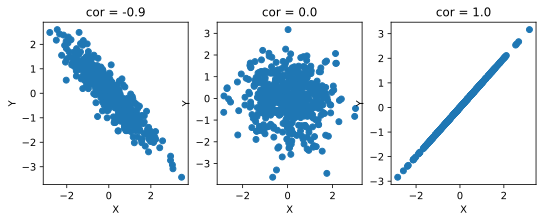

In [9]:
# Plot a few random variables adjustable correlations
cors = [-0.9, 0.0, 1.0]
d2l.plt.figure(figsize=(12, 3))
for i in range(3):
    X = torch.randn(500)
    Y = cors[i] * X + torch.sqrt(torch.tensor(1) -
                                 cors[i]**2) * torch.randn(500)

    d2l.plt.subplot(1, 4, i + 1)
    d2l.plt.scatter(X.numpy(), Y.numpy())
    d2l.plt.xlabel('X')
    d2l.plt.ylabel('Y')
    d2l.plt.title(f'cor = {cors[i]}')
d2l.plt.show()